In [60]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df_seq = pd.read_csv('protein-data-set/pdb_data_seq.csv')
df_no_dups = pd.read_csv('protein-data-set/pdb_data_no_dups.csv')

In [3]:
df_seq.head(10)

,structureId,chainId,sequence,residueCount,macromoleculeType
0,100D,A,CCGGCGCCGG,20,DNA/RNA Hybrid
1,100D,B,CCGGCGCCGG,20,DNA/RNA Hybrid
2,101D,A,CGCGAATTCGCG,24,DNA
3,101D,B,CGCGAATTCGCG,24,DNA
4,101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein
5,102D,A,CGCAAATTTGCG,24,DNA
6,102D,B,CGCAAATTTGCG,24,DNA
7,102L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,165,Protein
8,102M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein
9,103D,A,GTGGAATGGAAC,24,DNA


In [85]:
df_no_dups.head(10)

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0
1,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0
2,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
3,102D,DNA,X-RAY DIFFRACTION,DNA,24,2.20,7637.17,"VAPOR DIFFUSION, SITTING DROP",277.0,2.28,46.06,"pH 7.00, VAPOR DIFFUSION, SITTING DROP, temper...",7.0,1995.0
4,102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0
5,102M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,1.84,18010.64,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
6,103D,DNA,SOLUTION NMR,DNA,24,NaN,7502.93,NaN,NaN,NaN,NaN,NaN,NaN,1994.0
7,103L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,167,1.90,19092.72,NaN,NaN,2.70,54.46,NaN,NaN,1993.0
8,103M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18093.78,NaN,NaN,3.09,60.30,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
9,104D,DNA-RNA HYBRID,SOLUTION NMR,DNA/RNA Hybrid,24,NaN,7454.78,NaN,NaN,NaN,NaN,NaN,NaN,1995.0


In [5]:
# we only want proteins
protein_seq = df_seq[df_seq.macromoleculeType == 'Protein']
protein_no_dups = df_no_dups[df_no_dups.macromoleculeType == 'Protein']

In [6]:
# we need structureId as index to combine two datasets
# we need sequence and classifition for our task 
protein_seq = protein_seq[['structureId','sequence']]
protein_no_dups = protein_no_dups[['structureId','classification']]

In [8]:
# join two dataset using structureId as index
data = protein_no_dups.set_index('structureId').join(protein_seq.set_index('structureId'))
data.head(10)

,classification,sequence
structureId,,
101M,OXYGEN TRANSPORT,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
102L,HYDROLASE(O-GLYCOSYL),MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...
102M,OXYGEN TRANSPORT,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
103L,HYDROLASE(O-GLYCOSYL),MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...
103M,OXYGEN TRANSPORT,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
104L,HYDROLASE(O-GLYCOSYL),MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSAA...
104L,HYDROLASE(O-GLYCOSYL),MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSAA...
104M,OXYGEN TRANSPORT,VLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRF...
105M,OXYGEN TRANSPORT,VLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRF...


In [10]:
# count missing and drop rows with them 
print(data.isnull().sum())
data = data.dropna()
print(data.shape[0])

classification    0
sequence          0
dtype: int64
346321


In [46]:
# count numbers for each classification type
type_counts = data.classification.value_counts()
print(type_counts)

HYDROLASE                                46336
TRANSFERASE                              36424
OXIDOREDUCTASE                           34321
IMMUNE SYSTEM                            15615
LYASE                                    11682
HYDROLASE/HYDROLASE INHIBITOR            11218
TRANSCRIPTION                             8919
VIRAL PROTEIN                             8495
TRANSPORT PROTEIN                         8371
VIRUS                                     6972
SIGNALING PROTEIN                         6469
ISOMERASE                                 6356
LIGASE                                    4964
MEMBRANE PROTEIN                          4891
PROTEIN BINDING                           4884
STRUCTURAL PROTEIN                        4335
CHAPERONE                                 4156
STRUCTURAL GENOMICS, UNKNOWN FUNCTION     3548
SUGAR BINDING PROTEIN                     3474
DNA BINDING PROTEIN                       3199
PHOTOSYNTHESIS                            3139
ELECTRON TRAN

There are 4468 classification types


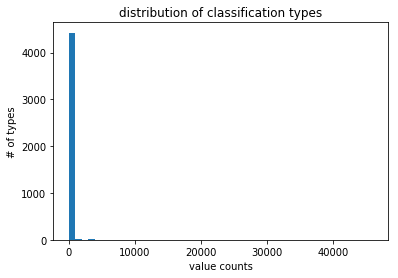

In [47]:
print("There are %d classification types" %type_counts.shape[0])
plt.title('distribution of classification types')
plt.hist(np.array(type_counts), bins = np.arange(start=0, stop=47000, step=1000))
plt.xlabel('value counts')
plt.ylabel('# of types')
plt.show()

In [50]:
# using classification types which counts are over 500
# filter dataset and only remain classification types > 500
types_500 = np.asarray(type_counts[(type_counts > 500)].index)
data_500 = data[data.classification.isin(types_500)]
print("There are %d classification types with counts > 500" %types_500.shape[0])
print()
print(types_500)
print()
print("There are %d rows of data" %data_500.shape[0])

There are 61 classification types with counts > 500

['HYDROLASE' 'TRANSFERASE' 'OXIDOREDUCTASE' 'IMMUNE SYSTEM' 'LYASE'
 'HYDROLASE/HYDROLASE INHIBITOR' 'TRANSCRIPTION' 'VIRAL PROTEIN'
 'TRANSPORT PROTEIN' 'VIRUS' 'SIGNALING PROTEIN' 'ISOMERASE' 'LIGASE'
 'MEMBRANE PROTEIN' 'PROTEIN BINDING' 'STRUCTURAL PROTEIN' 'CHAPERONE'
 'STRUCTURAL GENOMICS, UNKNOWN FUNCTION' 'SUGAR BINDING PROTEIN'
 'DNA BINDING PROTEIN' 'PHOTOSYNTHESIS' 'ELECTRON TRANSPORT'
 'TRANSFERASE/TRANSFERASE INHIBITOR' 'METAL BINDING PROTEIN'
 'CELL ADHESION' 'UNKNOWN FUNCTION' 'PROTEIN TRANSPORT' 'TOXIN'
 'CELL CYCLE' 'RNA BINDING PROTEIN' 'DE NOVO PROTEIN' 'HORMONE'
 'GENE REGULATION' 'OXIDOREDUCTASE/OXIDOREDUCTASE INHIBITOR' 'APOPTOSIS'
 'MOTOR PROTEIN' 'PROTEIN FIBRIL' 'METAL TRANSPORT'
 'VIRAL PROTEIN/IMMUNE SYSTEM' 'CONTRACTILE PROTEIN' 'FLUORESCENT PROTEIN'
 'TRANSLATION' 'BIOSYNTHETIC PROTEIN' 'OXYGEN TRANSPORT'
 'structural genomics, unknown function' 'LIPID BINDING PROTEIN'
 'CYTOKINE' 'VIRUS LIKE PARTICLE' 'h

In [51]:
# using classification types which counts are over 1000
# filter dataset and only remain classification types > 1000
types_1000 = np.asarray(type_counts[(type_counts > 1000)].index)
data_1000 = data[data.classification.isin(types_1000)]
print("There are %d classification types with counts > 1000" %types_1000.shape[0])
print()
print(types_1000)
print()
print("There are %d rows of data" %data_1000.shape[0])

There are 43 classification types with counts > 1000

['HYDROLASE' 'TRANSFERASE' 'OXIDOREDUCTASE' 'IMMUNE SYSTEM' 'LYASE'
 'HYDROLASE/HYDROLASE INHIBITOR' 'TRANSCRIPTION' 'VIRAL PROTEIN'
 'TRANSPORT PROTEIN' 'VIRUS' 'SIGNALING PROTEIN' 'ISOMERASE' 'LIGASE'
 'MEMBRANE PROTEIN' 'PROTEIN BINDING' 'STRUCTURAL PROTEIN' 'CHAPERONE'
 'STRUCTURAL GENOMICS, UNKNOWN FUNCTION' 'SUGAR BINDING PROTEIN'
 'DNA BINDING PROTEIN' 'PHOTOSYNTHESIS' 'ELECTRON TRANSPORT'
 'TRANSFERASE/TRANSFERASE INHIBITOR' 'METAL BINDING PROTEIN'
 'CELL ADHESION' 'UNKNOWN FUNCTION' 'PROTEIN TRANSPORT' 'TOXIN'
 'CELL CYCLE' 'RNA BINDING PROTEIN' 'DE NOVO PROTEIN' 'HORMONE'
 'GENE REGULATION' 'OXIDOREDUCTASE/OXIDOREDUCTASE INHIBITOR' 'APOPTOSIS'
 'MOTOR PROTEIN' 'PROTEIN FIBRIL' 'METAL TRANSPORT'
 'VIRAL PROTEIN/IMMUNE SYSTEM' 'CONTRACTILE PROTEIN' 'FLUORESCENT PROTEIN'
 'TRANSLATION' 'BIOSYNTHETIC PROTEIN']

There are 278866 rows of data


In [52]:
# using classification types which counts are over 1500
# filter dataset and only remain classification types > 1500
types_1500 = np.asarray(type_counts[(type_counts > 1500)].index)
data_1500 = data[data.classification.isin(types_1500)]
print("There are %d classification types with counts > 1500" %types_1500.shape[0])
print()
print(types_1500)
print()
print("There are %d rows of data" %data_1500.shape[0])

There are 33 classification types with counts > 1500

['HYDROLASE' 'TRANSFERASE' 'OXIDOREDUCTASE' 'IMMUNE SYSTEM' 'LYASE'
 'HYDROLASE/HYDROLASE INHIBITOR' 'TRANSCRIPTION' 'VIRAL PROTEIN'
 'TRANSPORT PROTEIN' 'VIRUS' 'SIGNALING PROTEIN' 'ISOMERASE' 'LIGASE'
 'MEMBRANE PROTEIN' 'PROTEIN BINDING' 'STRUCTURAL PROTEIN' 'CHAPERONE'
 'STRUCTURAL GENOMICS, UNKNOWN FUNCTION' 'SUGAR BINDING PROTEIN'
 'DNA BINDING PROTEIN' 'PHOTOSYNTHESIS' 'ELECTRON TRANSPORT'
 'TRANSFERASE/TRANSFERASE INHIBITOR' 'METAL BINDING PROTEIN'
 'CELL ADHESION' 'UNKNOWN FUNCTION' 'PROTEIN TRANSPORT' 'TOXIN'
 'CELL CYCLE' 'RNA BINDING PROTEIN' 'DE NOVO PROTEIN' 'HORMONE'
 'GENE REGULATION']

There are 267135 rows of data


In [57]:
# using classification types which counts are over 5000
# filter dataset and only remain classification types > 5000
types_5000 = np.asarray(type_counts[(type_counts > 5000)].index)
data_5000 = data[data.classification.isin(types_5000)]
print("There are %d classification types with counts > 5000" %types_5000.shape[0])
print()
print(types_5000)
print()
print("There are %d rows of data" %data_5000.shape[0])

There are 12 classification types with counts > 5000

['HYDROLASE' 'TRANSFERASE' 'OXIDOREDUCTASE' 'IMMUNE SYSTEM' 'LYASE'
 'HYDROLASE/HYDROLASE INHIBITOR' 'TRANSCRIPTION' 'VIRAL PROTEIN'
 'TRANSPORT PROTEIN' 'VIRUS' 'SIGNALING PROTEIN' 'ISOMERASE']

There are 201178 rows of data


In [61]:
#for data_5000 (only 12 classes), n_gram=4
# train test split
# create a Count Vectorizer to gather the unique elements in sequence
X_train_5000, X_test_5000,y_train_5000,y_test_5000 = train_test_split(data_5000['sequence'], data_5000['classification'], test_size = 0.2, random_state = 1)

vect = CountVectorizer(analyzer = 'char_wb', ngram_range = (4,4))
vect.fit(X_train_5000)
X_train_vect_5000 = vect.transform(X_train_5000)
X_test_vect_5000 = vect.transform(X_test_5000)


from sklearn.naive_bayes import MultinomialNB
prediction = dict()
model = MultinomialNB()
model.fit(X_train_vect_5000, y_train_5000)
NB_pred = model.predict(X_test_vect_5000)
prediction["MultinomialNB"] = accuracy_score(NB_pred, y_test_5000)
print( prediction['MultinomialNB'])

0.8508052490307187


In [70]:
#for data_5000 (only 12 classes), n_gram= 4-5
# train test split
# create a Count Vectorizer to gather the unique elements in sequence
X_train_5000, X_test_5000,y_train_5000,y_test_5000 = train_test_split(data_5000['sequence'], data_5000['classification'], test_size = 0.2, random_state = 1)

vect = CountVectorizer(analyzer = 'char_wb', ngram_range = (4,5))
vect.fit(X_train_5000)
X_train_vect_5000 = vect.transform(X_train_5000)
X_test_vect_5000 = vect.transform(X_test_5000)


from sklearn.naive_bayes import MultinomialNB
prediction = dict()
model = MultinomialNB()
model.fit(X_train_vect_5000, y_train_5000)
NB_pred = model.predict(X_test_vect_5000)
prediction["MultinomialNB"] = accuracy_score(NB_pred, y_test_5000)
print( prediction['MultinomialNB'])

0.9048613182224873


In [63]:
#for data_1000 (43 classes), n_gram=4
# train test split
# create a Count Vectorizer to gather the unique elements in sequence
X_train_1000, X_test_1000,y_train_1000,y_test_1000 = train_test_split(data_1000['sequence'], data_1000['classification'], test_size = 0.2, random_state = 1)

vect = CountVectorizer(analyzer = 'char_wb', ngram_range = (4,4))
vect.fit(X_train_1000)
X_train_vect_1000 = vect.transform(X_train_1000)
X_test_vect_1000 = vect.transform(X_test_1000)


from sklearn.naive_bayes import MultinomialNB
prediction = dict()
model = MultinomialNB()
model.fit(X_train_vect_1000, y_train_1000)
NB_pred = model.predict(X_test_vect_1000)
prediction["MultinomialNB"] = accuracy_score(NB_pred, y_test_1000)
print( prediction['MultinomialNB'])

0.7638505396779861


In [71]:
#for data_1000 (43 classes), n_gram=4-5
# train test split
# create a Count Vectorizer to gather the unique elements in sequence
X_train_1000, X_test_1000,y_train_1000,y_test_1000 = train_test_split(data_1000['sequence'], data_1000['classification'], test_size = 0.2, random_state = 1)

vect = CountVectorizer(analyzer = 'char_wb', ngram_range = (4,5))
vect.fit(X_train_1000)
X_train_vect_1000 = vect.transform(X_train_1000)
X_test_vect_1000 = vect.transform(X_test_1000)


from sklearn.naive_bayes import MultinomialNB
prediction = dict()
model = MultinomialNB()
model.fit(X_train_vect_1000, y_train_1000)
NB_pred = model.predict(X_test_vect_1000)
prediction["MultinomialNB"] = accuracy_score(NB_pred, y_test_1000)
print( prediction['MultinomialNB'])

0.8287553340266074


In [64]:
#for data_500 (61 classes), n_gram=4
# train test split
# create a Count Vectorizer to gather the unique elements in sequence
X_train_500, X_test_500,y_train_500,y_test_500 = train_test_split(data_500['sequence'], data_500['classification'], test_size = 0.2, random_state = 1)

vect = CountVectorizer(analyzer = 'char_wb', ngram_range = (4,4))
vect.fit(X_train_500)
X_train_vect_500 = vect.transform(X_train_500)
X_test_vect_500 = vect.transform(X_test_500)


from sklearn.naive_bayes import MultinomialNB
prediction = dict()
model = MultinomialNB()
model.fit(X_train_vect_500, y_train_500)
NB_pred = model.predict(X_test_vect_500)
prediction["MultinomialNB"] = accuracy_score(NB_pred, y_test_500)
print( prediction['MultinomialNB'])

0.7307580099878156


In [72]:
#for data_500 (61 classes), n_gram=4-5
# train test split
# create a Count Vectorizer to gather the unique elements in sequence
X_train_500, X_test_500,y_train_500,y_test_500 = train_test_split(data_500['sequence'], data_500['classification'], test_size = 0.2, random_state = 1)

vect = CountVectorizer(analyzer = 'char_wb', ngram_range = (4,5))
vect.fit(X_train_500)
X_train_vect_500 = vect.transform(X_train_500)
X_test_vect_500 = vect.transform(X_test_500)


from sklearn.naive_bayes import MultinomialNB
prediction = dict()
model = MultinomialNB()
model.fit(X_train_vect_500, y_train_500)
NB_pred = model.predict(X_test_vect_500)
prediction["MultinomialNB"] = accuracy_score(NB_pred, y_test_500)
print( prediction['MultinomialNB'])

0.812531104666129


In [73]:
data_5000.to_csv('data_5000.csv')

In [76]:
data_1500.to_csv('data_1500.csv')

In [74]:
data_1000.to_csv('data_1000.csv')

In [75]:
data_500.to_csv('data_500.csv')